In [15]:
import pandas as pd
import numpy as np


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def compare_energy_data(d3, mbd, offset_ref_index=(6, 0), isPlot=False):
    """
    Compare energy differences between two datasets with different cell lengths.

    Parameters:
        d3 (pd.DataFrame): First dataset with 'cell_length' and 'energy' columns.
        mbd (pd.DataFrame): Second dataset with 'cell_length' and 'energy' columns.
        offset_ref_index (tuple): A tuple specifying indices for offset calculation 
                                  (index for d3['energy'], index for mbd['energy']).
        isPlot (bool): If True, generates a plot comparing datasets and differences.

    Returns:
        float: Percentage change in energy difference relative to the reference energy.
    """
    # Calculate offset based on specified reference indices
    # offset = mbd['energy'][offset_ref_index[1]] - d3['energy'][offset_ref_index[0]]

    # Interpolate mbd's energy values at d3's cell_length points
    # Increase granularity by adding finer cell length points
    finer_cell_lengths = np.linspace(min(d3['cell_length']), max(d3['cell_length']), 500)
    mbd_interp = np.interp(finer_cell_lengths, mbd['cell_length'], mbd['energy'])
    
    # Handle null values in mbd_interp
    mbd_interp = np.nan_to_num(mbd_interp)

    # Interpolate d3's energy to match finer resolution
    d3_interp = np.interp(finer_cell_lengths, d3['cell_length'], d3['energy'])

    # Calculate the energy difference

    energy_diff = np.where(mbd_interp == 0, 0, mbd_interp - d3_interp)

    # Exclude NaN or zero values from the energy_diff when finding the maximum
    valid_indices = (energy_diff != 0) & (~np.isnan(energy_diff))
    valid_energy_diff = energy_diff[valid_indices]
    valid_cell_lengths = finer_cell_lengths[valid_indices]

    # Identify maximum energy difference and corresponding cell length
    max_diff = max(valid_energy_diff)
    max_diff_index = np.argmax(valid_energy_diff)
    max_diff_cell_length = valid_cell_lengths[max_diff_index]

    # Visualization
    if isPlot:
        plt.figure(figsize=(12, 7))
        plt.plot(d3['cell_length'], d3['energy'], label='Data 1 (Reference)', marker='o')
        plt.plot(mbd['cell_length'], mbd['energy'], label='Data 2 (Original)', marker='x')
        plt.plot(finer_cell_lengths, energy_diff, label='Energy Difference', linestyle='--')

        # Mark the maximum energy difference
        plt.scatter(max_diff_cell_length, max_diff, color='red', label=f'Max Diff: {max_diff:.2f} at {max_diff_cell_length:.2f}')
        plt.annotate(f'Max: {max_diff:.2f}\nLength: {max_diff_cell_length:.2f}',
                     xy=(max_diff_cell_length, max_diff),
                     xytext=(max_diff_cell_length + 0.5, max_diff - 0.5),
                     arrowprops=dict(facecolor='red', arrowstyle='->'),
                     fontsize=10, color='red')

        # Add labels and legend
        plt.xlabel('Cell Length')
        plt.ylabel('Energy')
        plt.title('Comparison of Energy vs Cell Length')
        plt.legend()
        plt.grid()

        # Show the plot
        plt.show()

        return abs(max_diff/ d3['energy'][3] * 100)


In [17]:
df = pd.read_csv("molecule_properties_shortest.csv")

# Save to a CSV file
molecules = df['Mol'].values


molecules = molecules[:-3]
molecules

array(['LiH', 'NaH', 'KH', 'RbH', 'CsH', 'Cu', 'LiF', 'CuI'], dtype=object)

Processing LiH...


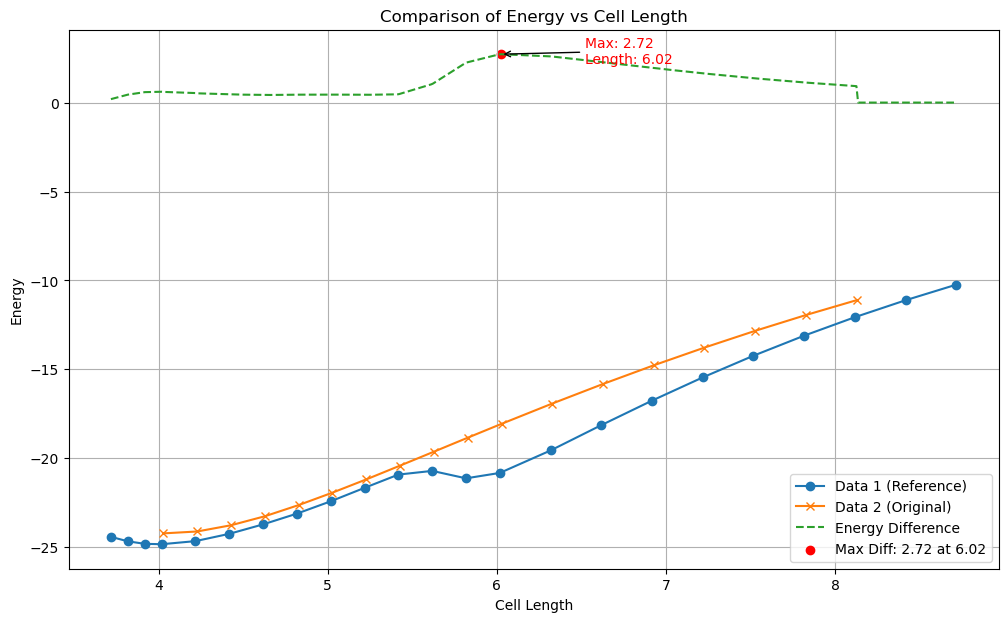

Max difference for LiH: 11.022302019494717
Processing NaH...


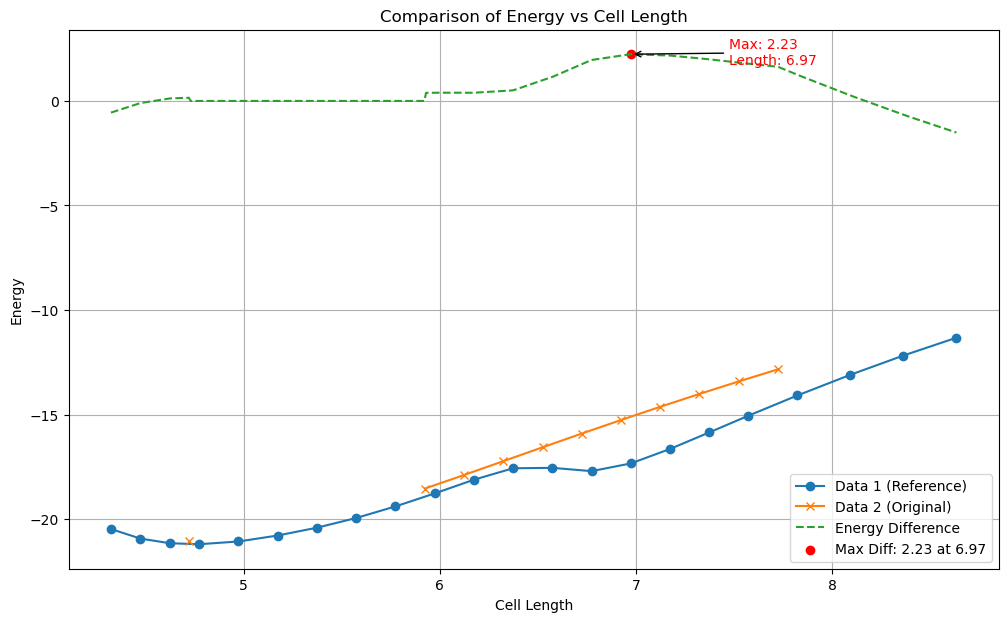

Max difference for NaH: 10.672867804260628
Processing KH...


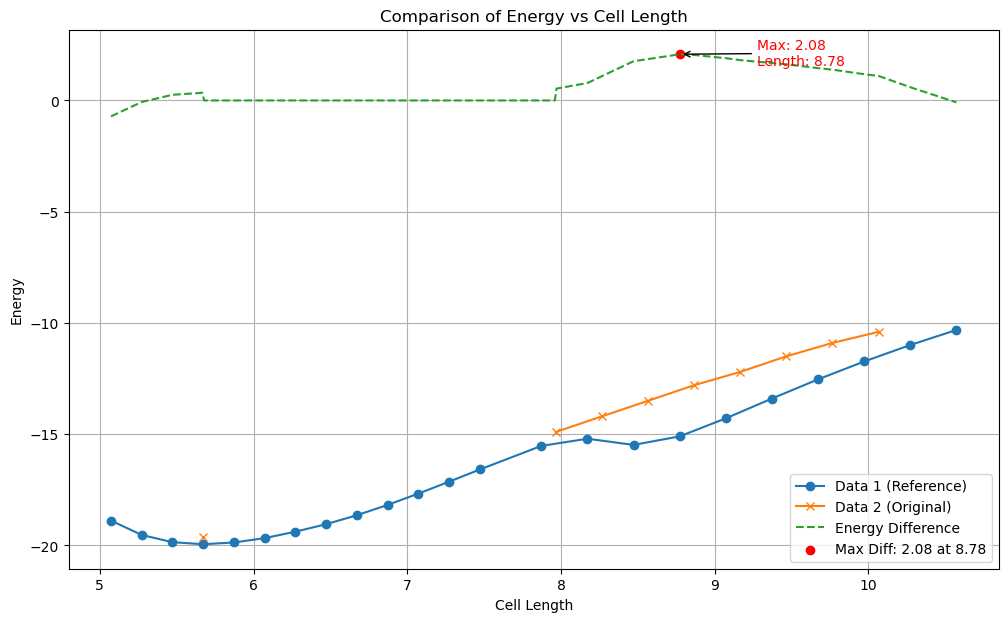

Max difference for KH: 10.641302762884033
Processing RbH...
Processing CsH...


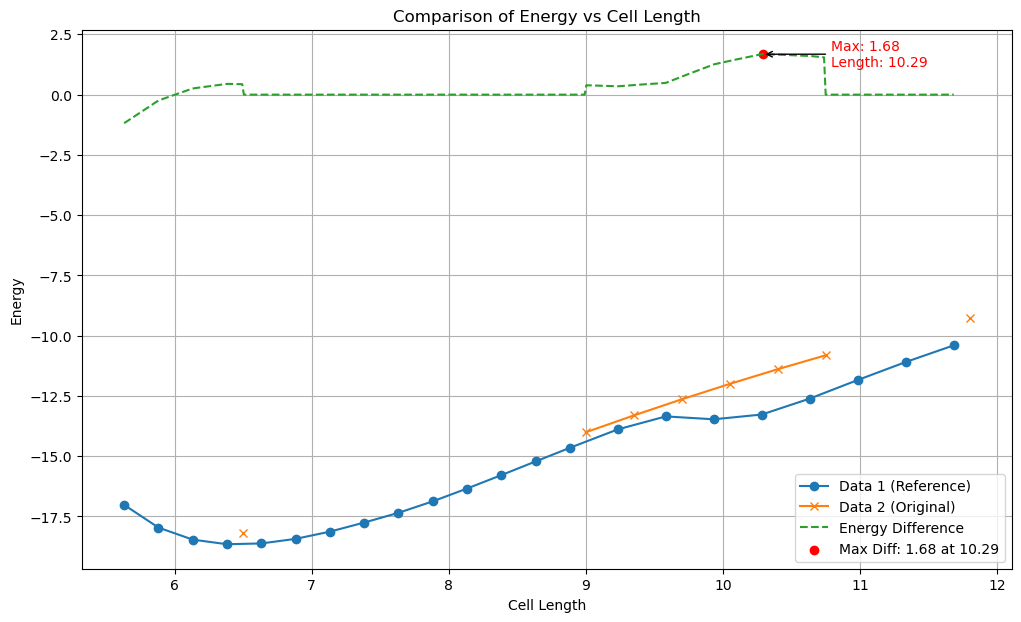

Max difference for CsH: 9.334687646718203
Processing Cu...


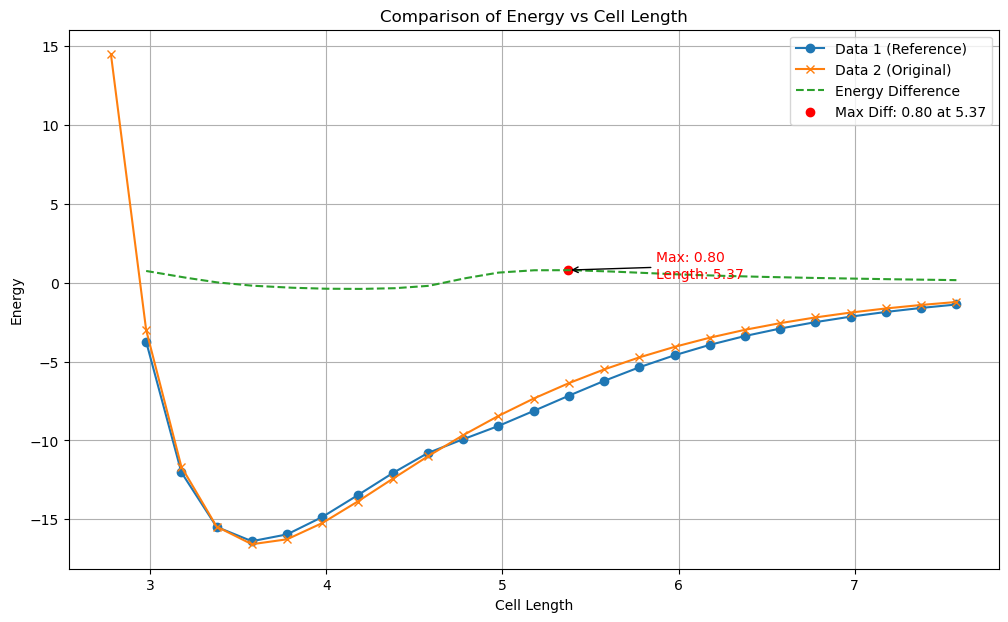

Max difference for Cu: 5.144230172680907
Processing LiF...


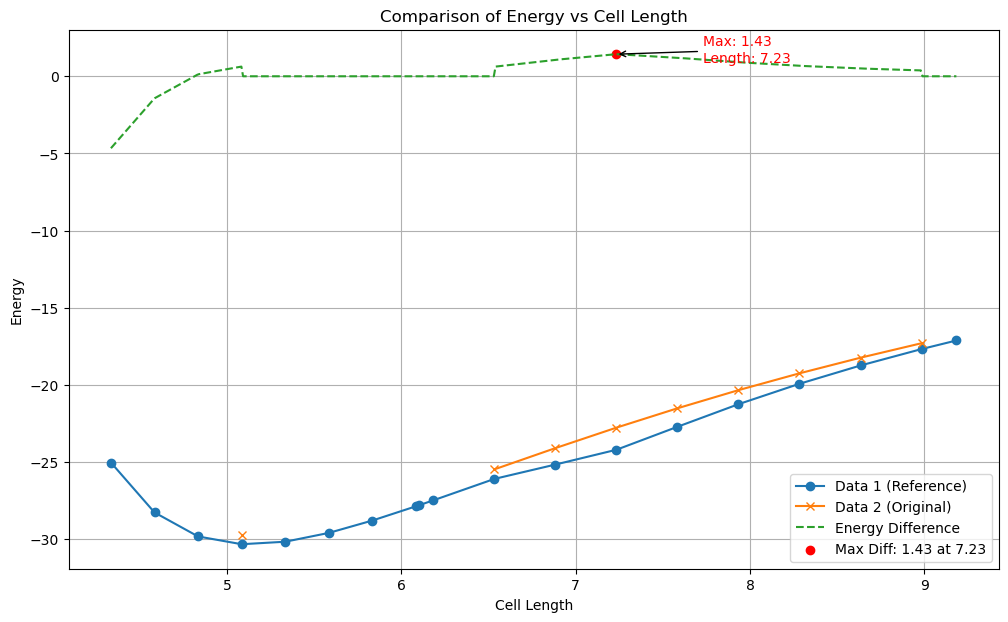

Max difference for LiF: 5.054847123025906
Processing CuI...
Skipping CuI      cell_length    energy  E-dispersion
1           NaN       NaN           NaN
2           NaN       NaN           NaN
3           NaN       NaN           NaN
4           NaN       NaN           NaN
5           NaN       NaN           NaN
6           NaN       NaN           NaN
7           NaN       NaN           NaN
8           NaN       NaN           NaN
9      4.308387 -2.836432      -0.00089
10     4.508387 -2.468753      -0.00099
11     4.708387 -2.149614      -0.00108
12     4.908387 -1.874794      -0.00120
13     5.108387 -1.643453      -0.00125
14     5.308387 -1.435274      -0.00128
15     5.558387 -1.229573      -0.00131
16          NaN       NaN           NaN


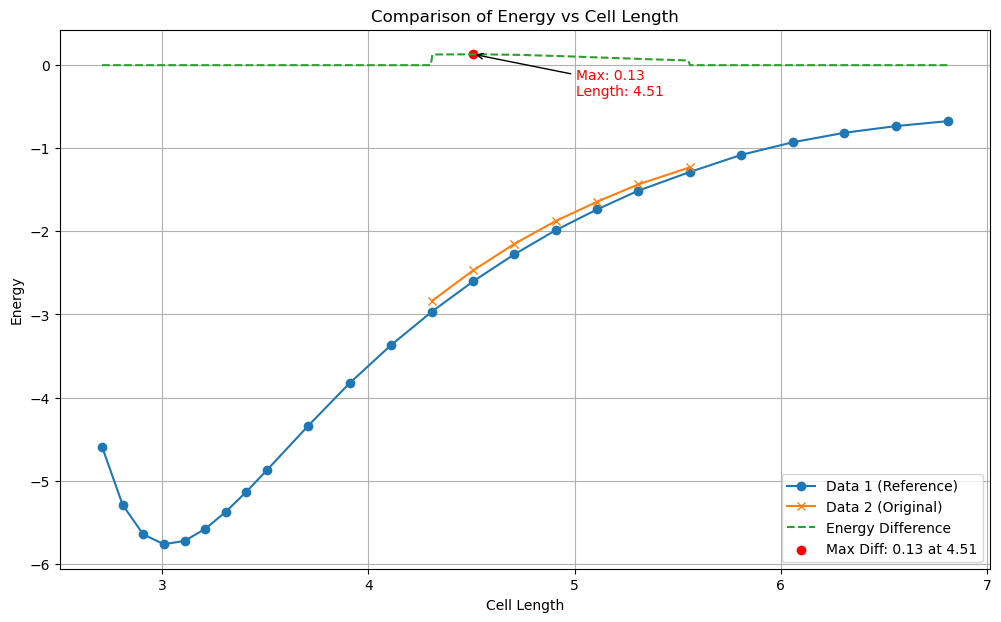

Max difference for CuI: 2.4856986891636836


{'LiH': 11.022302019494717,
 'NaH': 10.672867804260628,
 'KH': 10.641302762884033,
 'CsH': 9.334687646718203,
 'Cu': 5.144230172680907,
 'LiF': 5.054847123025906,
 'CuI': 2.4856986891636836}

In [20]:
res = {}

start = 5
end = -1

for comp in molecules:
    print(f"Processing {comp}...")
    d3 = pd.read_csv(f'd3/{comp}.csv')
    mbd = pd.read_csv(f'mbd/{comp}.csv')
    if comp == 'RbH':
        continue
    if comp == 'CuI':
        print("Skipping CuI ", mbd.iloc[1:,])
        ans = compare_energy_data(d3.iloc[2:,],mbd.iloc[1:,], isPlot=True)
    elif comp == 'Cu':
        ans = compare_energy_data(d3.iloc[1:,],mbd, isPlot=True)
    else:
        ans = compare_energy_data(d3.iloc[2:,],mbd, isPlot=True)
    res[comp] = ans
    print(f"Max difference for {comp}: {ans}")
    # print(f"Max difference for {comp}: {ans}")

res